# This notebook is made to visualize differential equations
---

## In particular we will focus on second order differential equations

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$

---

### The analysis will be done in the following points:

1. [Visualizing the vecotor field](#Visualizing_the_vecotor_field)
2. [Simulating the trajectories](#Simulating_the_trajectories)
3. [Analyzing non-linear parts of the manifold](#Analyzing_non-linear_parts_of_the_manifold)

---

The differential equation rappresents two populations, one of rabbits and on of sheeps ....

### Discuss the isoclines and position of the vector based on what I wrote on my notes

#### Reqiurements installation in quiet mode

In [ ]:
%pip -q install numpy
%pip -q install matplotlib
%pip -q install ipympl

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

In [6]:
def eq_diff(x,y,a,b):
    u = x * (3 - a * x - b * y)
    v = y * (2 - x - y)
    return (u,v)

In [ ]:
# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300

def update_plot(a=2, b=1, size=0.125):
    # Generate some random data
    x, y = np.meshgrid(np.arange(-0.5, 3, size), np.arange(-0.5, 3, size))
    u, v = eq_diff(x,y,a,b)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)

    # Create the plot
    fig, ax = plt.subplots()

    # Add isoclines
    x_isocline = np.linspace(-0.5, 3, 100)
    y_isocline1 = 3 - 2 * x_isocline
    y_isocline2 = 2 - x_isocline

    ax.plot(x_isocline, y_isocline2, color='navy', linestyle='--', label='2 - x', linewidth=1)
    ax.plot(x_isocline, y_isocline1, 'g--', label='3 - 2x', linewidth=1)
    ax.axvline(x=0, color='g', linestyle='--', label='x = 0', linewidth=1)
    ax.axhline(y=0, color='navy', linestyle='--', label='y = 0', linewidth=1)

    # Add legend with smaller font size
    ax.legend(fontsize='small', loc='upper right')

    # Set axis limits
    ax.set_xlim(-0.5, 3)
    ax.set_ylim(-0.5, 3)

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v)

    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    plt.show()

update_plot()

### Visualizing the vecotor field

In [8]:
# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300

def update_plot(a=2, b=1, size=0.1):
    # Generate some random data
    x, y = np.meshgrid(np.arange(0, 3, size), np.arange(0, 3, size))
    u, v = eq_diff(x,y,a,b)

    # Calculate the magnitude of each vector and clip it so that we can get better coloring
    mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)

    # Normalize the vectors
    norm = np.sqrt(u**2 + v**2)
    u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
    v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)

    # Create the plot
    fig, ax = plt.subplots()

    # Set the colormap to 'cool'
    q = ax.quiver(x, y, u, v, mag, cmap='viridis')

    # Set the colorbar limits to the range of the magnitudes
    q.set_clim([mag.min(), mag.max()])

    # Set the colorbar ticks and labels
    cbar = plt.colorbar(q)
    cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
    cbar.set_ticklabels(['Low', 'Medium', 'High'])
    
    plt.show()

In [ ]:
a_slider = FloatSlider(min=0, max=5, step=0.25, value=2, description='a')
b_slider = FloatSlider(min=0, max=5, step=0.25, value=1, description='b')
size_slider = FloatSlider(min=0.05, max=0.2, step=0.05, value=0.1, description='size')

# Create the interactive plot
interactive(update_plot, a=a_slider, b=b_slider, size=size_slider)

#### Multiple plots for different values of a and b

In [ ]:
def create_phase_diagrams(a_vals, b_vals, axs = None):    
    # Iterate over the subplots and plot a graph in each one
    for i, ax in enumerate(axs.flat):
        # Set the values of a and b based on the index i
        a = a_vals[i]
        b = b_vals[i]

        # Generate the data for the graph
        x, y = np.meshgrid(np.arange(0, 3.5, 0.1), np.arange(0, 2.5, 0.1))
        
        # unpack the return value
        u,v = eq_diff(x,y,a,b)
        
        # Calculate the magnitude and normalize the vectors
        mag = np.clip(np.sqrt(u**2 + v**2), -10, 2)
        norm = np.sqrt(u**2 + v**2)
        u = np.divide(u, norm, out=np.zeros_like(u), where=norm!=0)
        v = np.divide(v, norm, out=np.zeros_like(v), where=norm!=0)
            
        # Plot the graph using quiver plot
        q = ax.quiver(x, y, u, v, mag, cmap='Spectral_r')
        q.set_clim([mag.min(), mag.max()])
        
        # Add a colorbar to the graph
        cbar = plt.colorbar(q, ax=ax)
        cbar.set_ticks([mag.min(),(mag.min() + mag.max())/ 2, mag.max()])
        cbar.set_ticklabels(['Low', 'Medium', 'High'])
        
        # Add a title to the subplot
        ax.set_title(f'Graph values: a={a}, b={b}')

In [ ]:
# Set the DPI of the figure
plt.rcParams['figure.dpi'] = 300
# Set the font size of the labels and title
plt.rcParams['font.size'] = 5

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2)

a_vals = [1, 2, 1, 3]
b_vals = [2, 1, 3, 1]

create_phase_diagrams(a_vals,b_vals,axs)

# Display the plot
plt.show()

# Simulating the trajectories

### Lets remember this is our system:

##### Our differential equation can be written as follows:
> With _a_ and _b_ as parameters

$$
\begin{cases}
    \dot{x} = x(3 - ax - by) \\
    \dot{y} = y(2 - x - y)
\end{cases}
$$


##### Install numba as a requirement to run the jit

In [ ]:
%pip -q install numba

#### Import necessary libraries and define the function

In [9]:
from numba import *
import numpy as np

# import it from the library directory
from library.eqdiff_solver import *

# remeber that x can be multi dimensional so the function is general to n dimensino
@njit(cache=True)
def f(x, a=2.0, b=1.0) -> np.ndarray[float64]:
    # Define the equations
    u = x[0] * (3 - a * x[0] - b * x[1])
    v = x[1] * (2 - x[0] - x[1])
    return np.array([u, v])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def draw_trajectories(f, dt=0.1, final_time=1, points=[[0, 0], [1, 1], [2, 2]]):
    # Convert points to a NumPy array
    x0_array = np.array(points).reshape(-1, 2)

    # Calculate the trajectories
    trajectories = vectorized_runge_kutta(f, x0_array, dt, final_time)

    # Create a plot
    fig, ax = plt.subplots()
    cmap = plt.get_cmap("viridis")

    # Iterate through the trajectories
    for i in range(len(x0_array)):
        x_traj = trajectories[i][:, 0]
        y_traj = trajectories[i][:, 1]
        color = cmap(i / len(x0_array))
        
        # Plot the trajectory
        ax.plot(x_traj, y_traj, color=color, linewidth=1)

        # I need to do this because if I just take the middle point some trajectory are really fast and thus I get the arrow at the end
        # ---------------------
        
        # Calculate the cumulative distance along the trajectory
        distances = np.sqrt(np.diff(x_traj)**2 + np.diff(y_traj)**2)
        cumulative_distances = np.cumsum(distances)
        
        # Find the index where the distance is half of the total distance
        middle_index = np.argmax(cumulative_distances >= cumulative_distances[-1] / 2)

        # ---------------------

        # Calculate the arrow direction using the middle two points
        dx = x_traj[middle_index] - x_traj[middle_index - 1]
        dy = y_traj[middle_index] - y_traj[middle_index - 1]

        # Add a smaller arrow at the middle of the trajectory
        ax.arrow(x_traj[middle_index - 1], y_traj[middle_index - 1], dx, dy, head_width=0.04, head_length=0.08, fc=color, ec=color)

    # Set labels, title, and axis limits
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(0, 3.5)
    ax.set_ylim(0, 3.5)
    ax.set_title(f'Trajectories of the Differential Equation dt = {dt}')

    # Set the background color and remove unnecessary spines
    fig.patch.set_facecolor("white")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Add grid lines
    ax.grid(True, linestyle="--", color="gray", alpha=0.5)

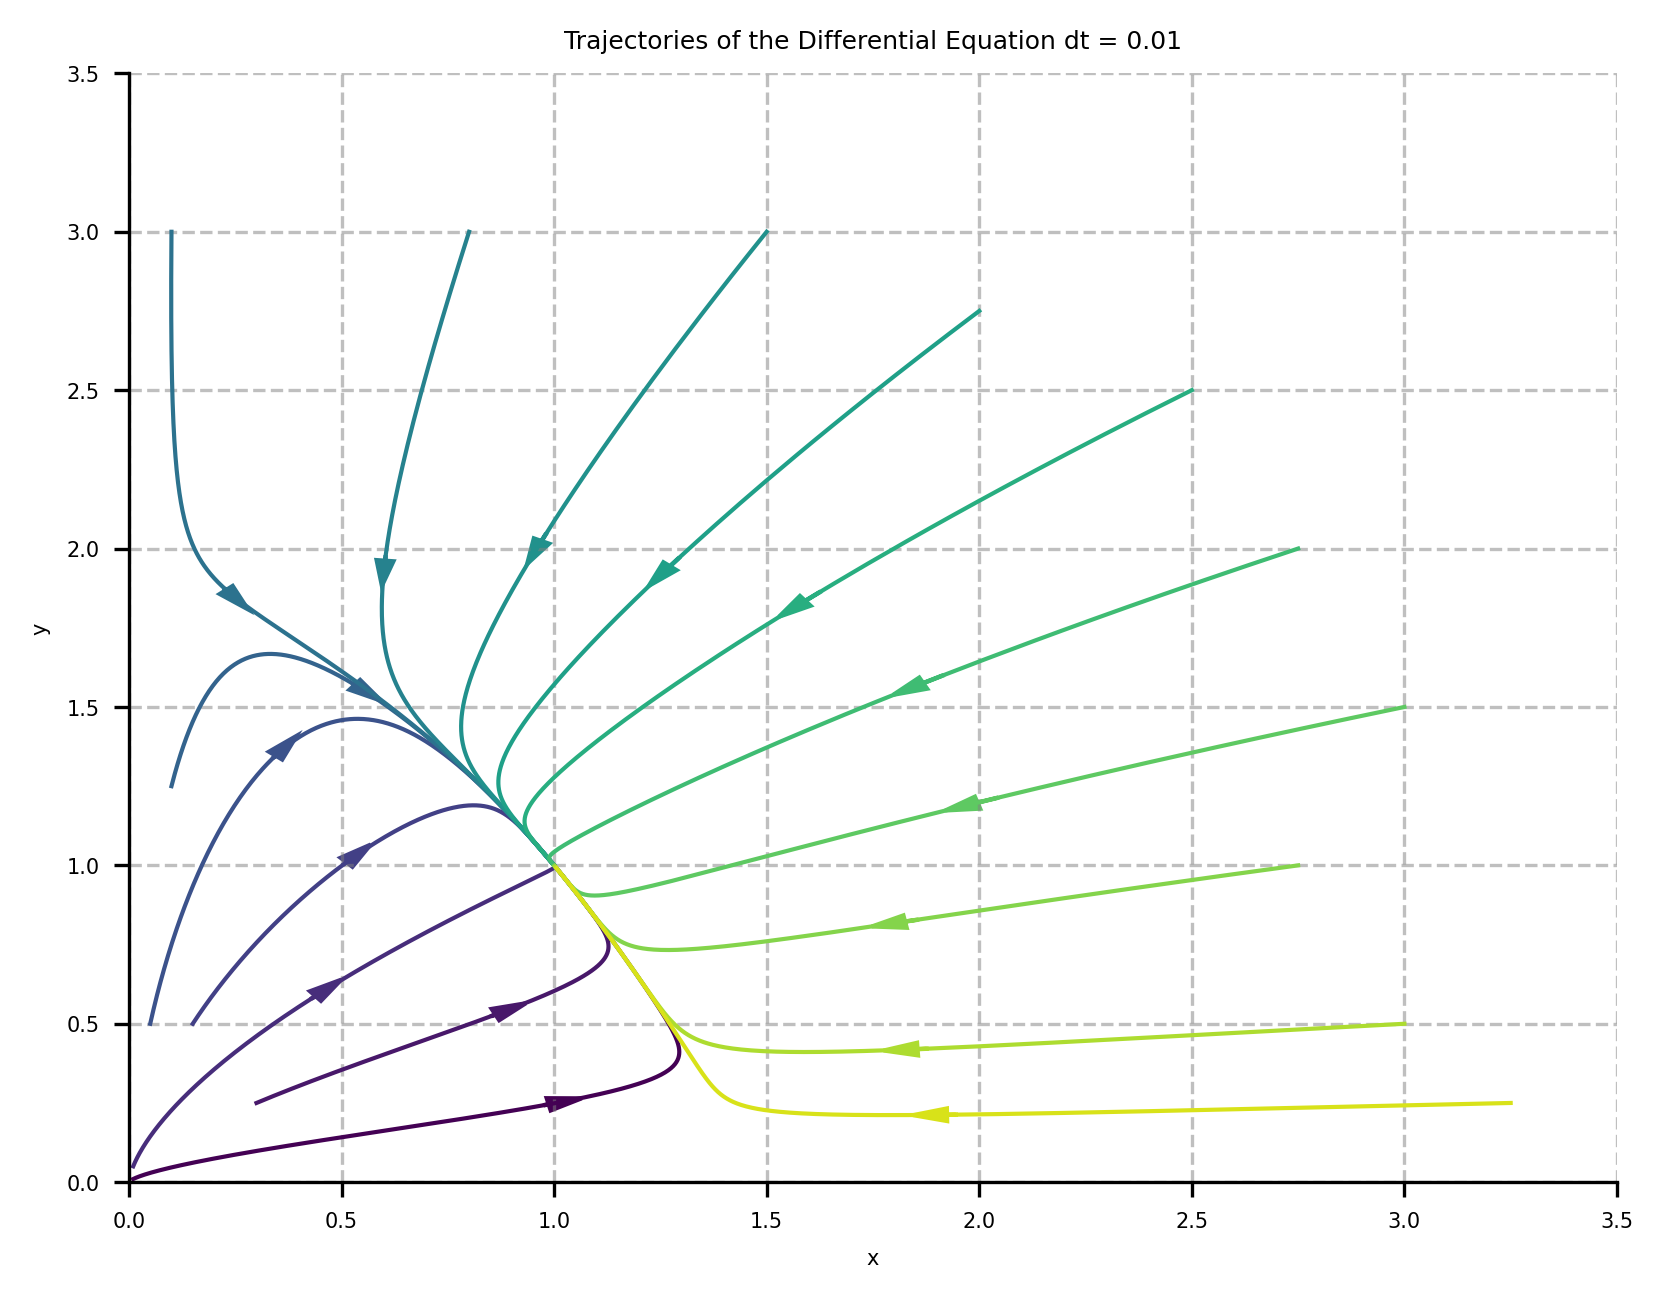

In [11]:
# A few interesting starting points
starting_points = [[0.01, 0.01], [0.3, 0.25], [0.01, 0.05], [0.15, 0.5], [0.05, 0.5], 
                   [0.1, 1.25], [0.1, 3], [0.8,3], [1.5, 3], [2,2.75], [2.5,2.5], 
                   [2.75, 2], [3,1.5], [2.75, 1], [3,0.5], [3.25, 0.25]]

draw_trajectories(f=f, dt = 0.01, final_time = 15, points = starting_points)

### Try out the varius methods

In [ ]:
# Initialize an array fo yr the initial contions
x0 = np.array([0.1, 0.1])
# Delta time
dt = 0.5
# Final time
final_time = 10

# The number of step is automatically computed the function is also inside eqdiff_solver
x = plot_solution(f, x0, dt=dt, final_time=final_time, rk_only= False)

## Analyzing the manifold trajectories

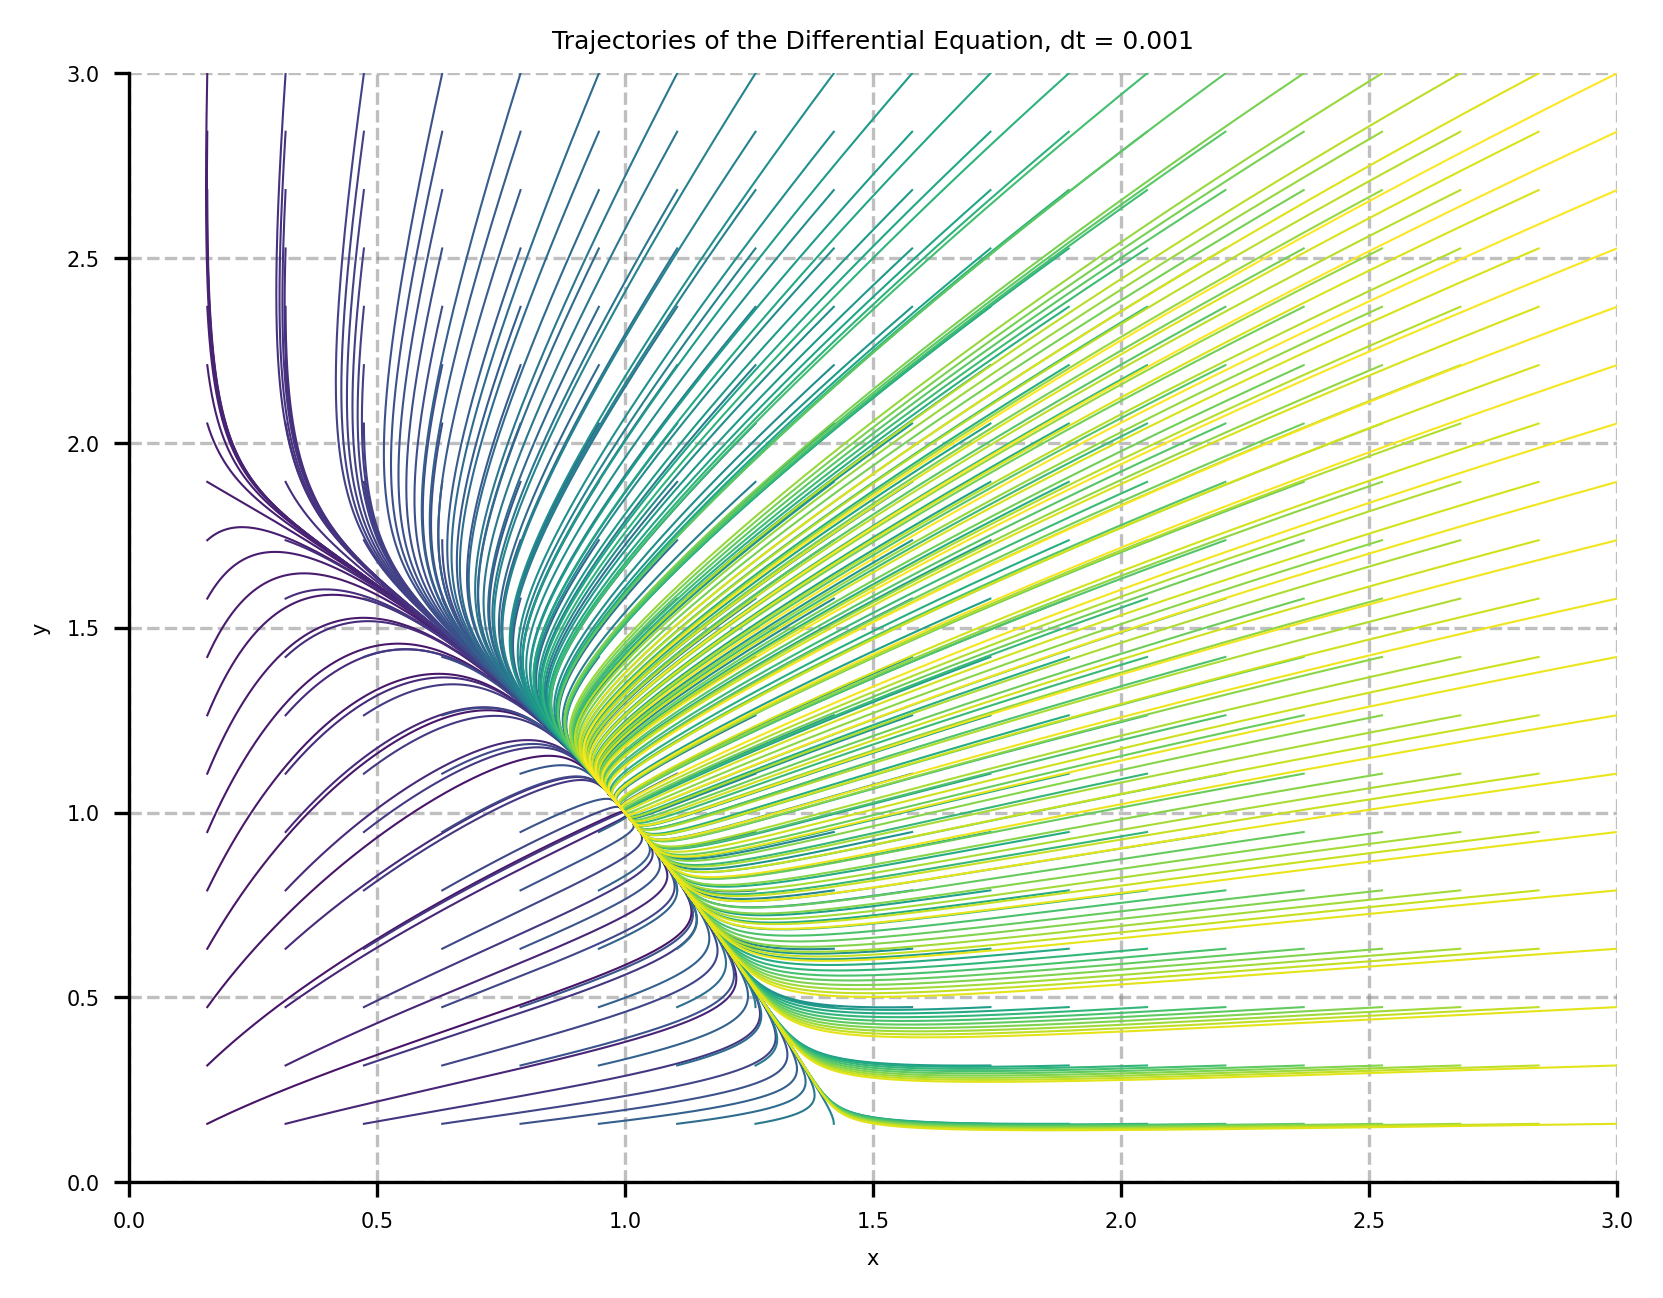

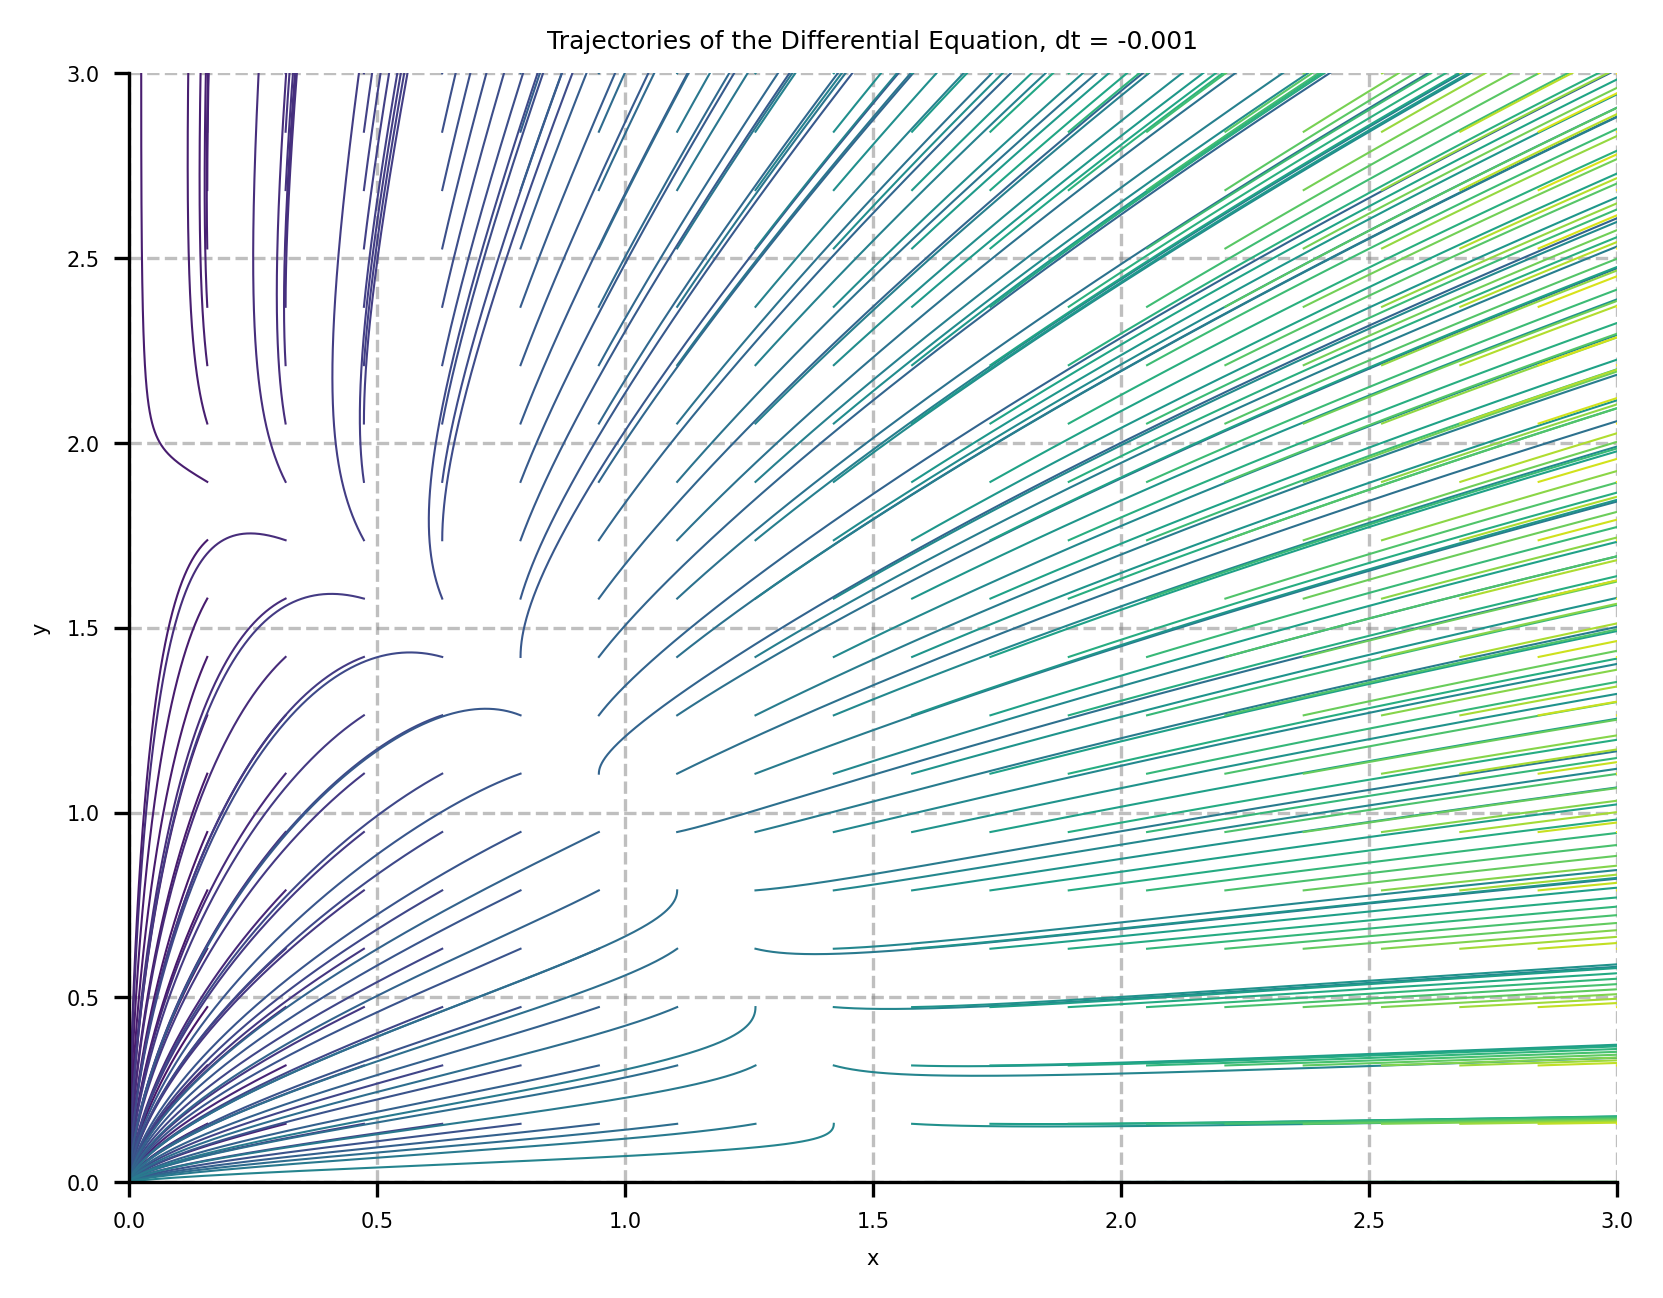

In [13]:
# The number of step is automatically computed the function is also inside eqdiff_solver
phase_diagram_trajectories(f, dt=0.001, final_time=10, num=20, start=-0, end=3)
phase_diagram_trajectories(f, dt=-0.001, final_time=-10, num=20, start=-0, end=3)

# Close all open figures
plt.close('all')

## Analyzing the non linear extension of the manifold

In [ ]:
# Delta time
dt = 0.01

# Final time
final_time = 10

# a and b values
list_ab = [(1, 2), (2, 1), (1, 3), (3, 1)]

# Phase diagram forward in time
multiple_phase_diagram_trajectories(f, list_ab, dt=dt, final_time=final_time, num=30, start=-4, end=4)

# Phase diagram reversing time
multiple_phase_diagram_trajectories(f, list_ab, dt=-dt, final_time=-final_time, num=30, start=-4, end=4)

# Close all open figures
plt.close('all')